In [ ]:
import numpy as np # lineer Cebir
import pandas as pd # cvs dosyalarını okumak için
import matplotlib.pyplot as plt
import os,fnmatch
import librosa
import IPython.display as ipd

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive


/content/gdrive/My Drive/My
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists


In [ ]:
cd /mydrive/My/data

/content/gdrive/My Drive/My/data


In [ ]:
ls

Ali_10.wav   Arzu_1.wav    Dilek_29.wav  elif_38.wav    Reyyan_47.wav
Ali_11.wav   Arzu_20.wav   Dilek_2.wav   elif_39.wav    Reyyan_48.wav
Ali_12.wav   Arzu_21.wav   Dilek_30.wav  elif_3.wav     Reyyan_49.wav
Ali_13.wav   Arzu_22.wav   Dilek_31.wav  elif_40.wav    Reyyan_4.wav
Ali_14.wav   Arzu_23.wav   Dilek_32.wav  elif_41.wav    Reyyan_50.wav
Ali_15.wav   Arzu_24.wav   Dilek_33.wav  elif_42.wav    Reyyan_5.wav
Ali_16.wav   Arzu_25.wav   Dilek_34.wav  elif_43.wav    Reyyan_6.wav
Ali_17.wav   Arzu_26.wav   Dilek_35.wav  elif_44.wav    Reyyan_7.wav
Ali_18.wav   Arzu_27.wav   Dilek_36.wav  elif_45.wav    Reyyan_8.wav
Ali_19.wav   Arzu_28.wav   Dilek_37.wav  elif_46.wav    Reyyan_9.wav
Ali_1.wav    Arzu_29.wav   Dilek_38.wav  elif_47.wav    Zeliha_10.wav
Ali_20.wav   Arzu_2.wav    Dilek_39.wav  elif_48.wav    Zeliha_11.wav
Ali_21.wav   Arzu_30.wav   Dilek_3.wav   elif_49.wav    Zeliha_12.wav
Ali_22.wav   Arzu_31.wav   Dilek_40.wav  elif_4.wav     Zeliha_13.wav
Ali_23.wav   Arzu_32.wav  

In [ ]:
x,sr=librosa.load("/content/gdrive/MyDrive/My/data/Ali_45.wav",duration=3)
ipd.Audio(x,rate=sr)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


#**3.	Bir ses dosyası yükleme, oynatma, kaydetme, görüntüleme**

Librosa müzik ve ses analizi için kullanılan bir Python paketidir.

**signal → ses zaman serisi**

**sampling_rate →ses frekansı(Hz)**


In [ ]:
import librosa
import librosa.display

sound_path = "/content/gdrive/MyDrive/My/data/Ali_45.wav"
signal, sampling_rate = librosa.load(sound_path, sr=None)

print("signal type:",type(signal),"sr type",type(sampling_rate))
print(signal.shape,sampling_rate)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


signal type: <class 'numpy.ndarray'> sr type <class 'int'>
(782400,) 48000


**Sesi oynatmak için IPython kütüphanesinden yararlanıyoruz.**

In [ ]:
from IPython import display
display.Audio(signal, rate=sampling_rate)

**Sesi Görüntüleme**

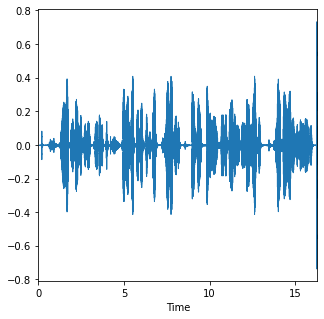

In [ ]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(5,5))
librosa.display.waveplot(signal,sr=sampling_rate)

#**4. Spektrogram**


**Spektrogram, belirli bir dalga formunda bulunan çeşitli frekanslarda bir sinyalin sinyal gücünü veya yüksekliğini temsil eden görseldir. Aynı zamanda enerji seviyelerini zaman içinde nasıl değiştiğini de gösterir.**

**Time Fourier Transform: Ses sinyali işlemek için güçlü bir araçtır. Sinyaller için zamana ve frekansa göre karmaşık genliği belirten zaman frekansı dağılımını tanımlar**

https://musiclab.chromeexperiments.com/Spectrogram/


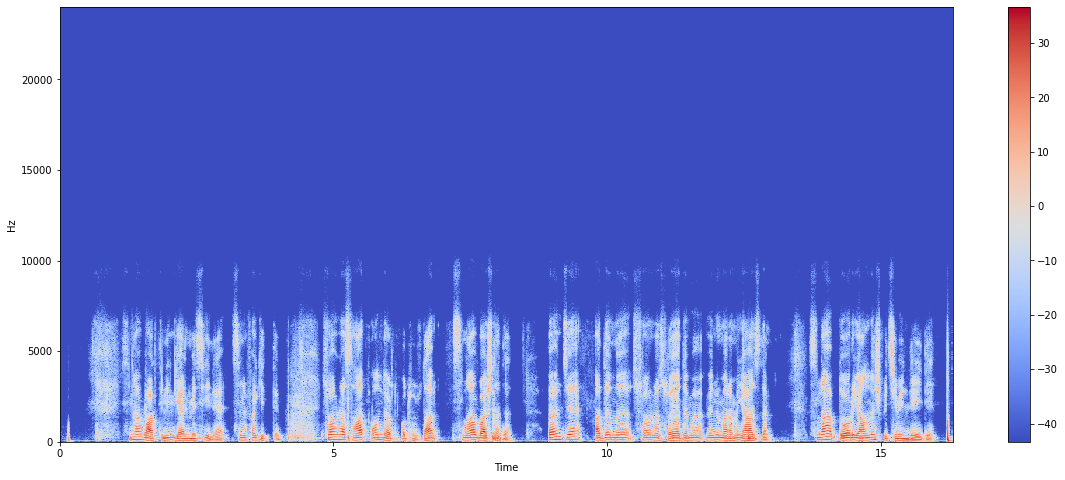

In [ ]:
X=librosa.stft(signal) #stft -> Short-time Fourier transform
Xdb=librosa.amplitude_to_db(abs(X)) #Genlikten Desibel değerine
plt.figure(figsize=(20,8))
librosa.display.specshow(Xdb,sr=sampling_rate,x_axis="time",y_axis="hz")
plt.colorbar()

#**5. Feature Extraction — Öznitelik Çıkarımı**

1.   Mel-Frekans Kepstral Katsayıları
2.   Zero Crossing Rate
3.   Spectral Centroid
4.   Spectral Rolloff
5.   Chroma Frekansı
6.   Spektral Bant Genişliği



**1.   Mel-Frekans Kepstral Katsayıları**

Mel-Frekans Kepstral Katsayıları (Mel-Frequency Cepstral Coefficients)

Mel frekans ölçeği, insan kulağının ses frekanslarındaki değişimi algılayışını gösteren bir ölçektir. MFCC(Mel-Frequency Cepstral Coefficients), ses sinyalinin kısa zamanlı güç spektrumunun Mel ölçeği üzerindeki ifadesidir.

Frekanstan Mel ölçeğine dönüşüm formülü;

M ═ 1125 × ln(1+(f÷700))

M → Mel ölçeği

f → Frekans(Hz)

In [ ]:
mfkk=librosa.feature.mfcc(signal,sr=sampling_rate)
print(mfkk.shape)


(20, 1529)


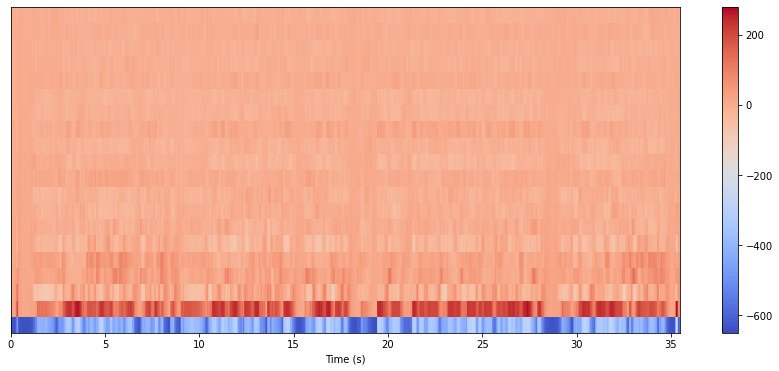

In [ ]:
plt.figure(figsize=(15,6))
librosa.display.specshow(mfkk,x_axis="s")
plt.colorbar()

**2.   Zero Crossing Rate**

Zero crossing rate bir sinyalin sıfır çizgisinden geçişi yani işaret değişiminin oranıdır.
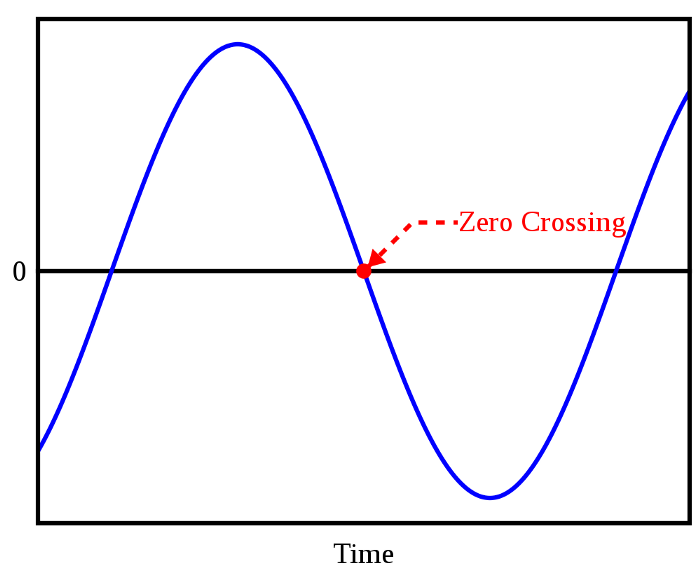

In [ ]:
zero_crossing=librosa.zero_crossings(signal)
print(sum(zero_crossing)) #Toplam sıfır geçişi sayısı

36095


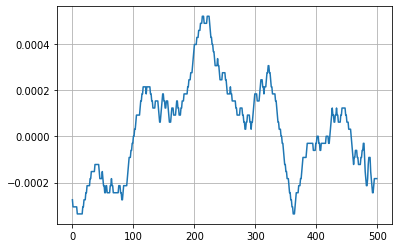

In [ ]:
plt.plot(signal[5000:5500])
plt.grid()

**3.   Spectral Centroid**

Spektrumun kütle merkezinin nerede olduğunu gösterir.

(1, 1529)


Text(0, 0.5, 'Hz')

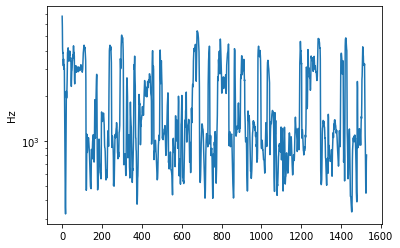

In [ ]:
spec_cent=librosa.feature.spectral_centroid(signal,sr=sampling_rate)
print(spec_cent.shape)

plt.semilogy(spec_cent.T)
plt.ylabel("Hz")


**4.   Spectral Rolloff**

Sinyal şeklinin ölçüsü. Toplam spektral enerjisinin belli bir yüzdesini temsil eder.

(1, 1529)


Text(0, 0.5, 'Hz')

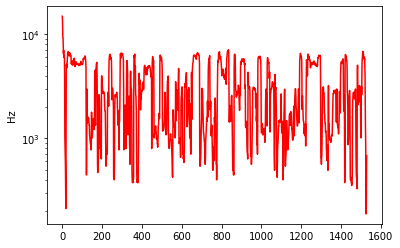

In [ ]:
spec_roll=librosa.feature.spectral_rolloff(signal,sr=sampling_rate)
print(spec_roll.shape)

plt.semilogy(spec_roll.T,"r")
plt.ylabel("Hz")

**5.   Chroma Frekansı**

Spektrum müzikal oktavının 12 farklı yarı tonunu(chroma) temsil eden 12 parçanın belirtildiği ses için güçlü bir sunumudur.

(12, 1529)


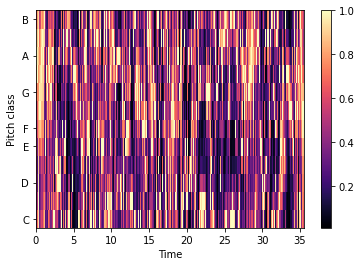

In [ ]:
chroma=librosa.feature.chroma_stft(signal,sr=sampling_rate)
print(chroma.shape)

librosa.display.specshow(chroma,y_axis="chroma",x_axis="time")
plt.colorbar()

## Spektral Bant Genişliği**

Ses sinyalinin dalga genişliğinin maksimum tepe noktasının yarısını tanımlar.


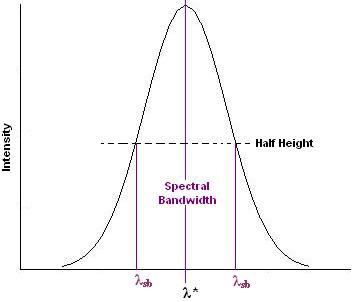


In [ ]:
spec_band=librosa.feature.spectral_bandwidth(signal,sr=sampling_rate)
print(spec_band,spec_band.shape)

[[6374.50581373 6494.72973842 6091.27668269 ... 1729.27025278
  2052.64431843 2067.68255327]] (1, 1529)
